In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#import data
cs2m = pd.read_csv('cs2m.csv')
cs2m = pd.DataFrame(cs2m)

In [3]:
grades = pd.read_csv('grades.csv')
grades = pd.DataFrame(grades)

In [8]:
#Appearance of Data
cs2m.shape

(30, 6)

In [5]:
grades.shape

(105, 22)

In [6]:
len(grades.final)

105

In [7]:
len(cs2m.BP)

30

In [10]:
grades.firstname.unique().shape

(98,)

In [11]:
grades.firstname.unique()

array(['ALFRED', 'SCOTT', 'JACKIE', 'ANN', 'VALERIE', 'TANIECE', 'DANIEL',
       'JENNY', 'KREG', 'DAWN', 'NANCY', 'MARK', 'DENNIS', 'ELAINE',
       'DERRICK', 'MICKEY', 'JONATHAN', 'ROBERT', 'GLENDON', 'JAMES',
       'VIDYUTH', 'RENE', 'DAVENA', 'SHANNON', 'GWEN', 'VICTORINE',
       'MARY', 'TAMARA', 'WILLIAM', 'MIHAELA', 'MONIKA', 'JASON', 'NIKKI',
       'PAULA', 'SUZANNA', 'MATHEW', 'SUZANNE', 'DANA', 'TIM', 'HEIDI',
       'GAIL', 'SANDRA', 'BLAIR', 'LIZA', 'JOE', 'CYNTHE', 'LAUREL',
       'DAWNE', 'KIMBERLY', 'SHELLY', 'LISA', 'WAYNE', 'HUSIBA', 'LUCY',
       'MARITESS', 'OLIMPIA', 'RUSS', 'ANNELIES', 'VIKKI', 'JOHN',
       'TAMMY', 'DEANNA', 'DALE', 'LOIS', 'FRED', 'JIM', 'TREVOR',
       'BONNIE', 'IVAN', 'ERIC', 'STACY', 'BRENDA', 'CLAYTON', 'YVONNE',
       'RENAE', 'CARL', 'JYLL', 'KATHRYN', 'DON', 'NICHOLAS', 'MIRNA',
       'JACQUELINE', 'CARHERINE', 'CHYRELLE', 'LETICIA', 'LUCIO',
       'MICHELLE', 'RICHARD', 'KHANH', 'DENISE', 'MARTINE', 'SHERRY',
       'JANN', 

In [12]:
grades['quiz1'].dtype

dtype('int64')

In [13]:
cs2m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
BP         30 non-null int64
Chlstrl    30 non-null int64
Age        30 non-null int64
Prgnt      30 non-null int64
AnxtyLH    30 non-null int64
DrugR      30 non-null int64
dtypes: int64(6)
memory usage: 1.5 KB


In [14]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 22 columns):
Sr_No        105 non-null int64
id           105 non-null int64
lastname     105 non-null object
firstname    105 non-null object
gender       105 non-null int64
ethnicity    105 non-null int64
year         105 non-null int64
lowup        105 non-null int64
section      105 non-null int64
gpa          105 non-null float64
extrc        105 non-null int64
review       105 non-null int64
quiz1        105 non-null int64
quiz2        105 non-null int64
quiz3        105 non-null int64
quiz4        105 non-null int64
quiz5        105 non-null int64
final        105 non-null int64
total        105 non-null int64
percent      105 non-null int64
grade        105 non-null object
passfail     105 non-null object
dtypes: float64(1), int64(17), object(4)
memory usage: 16.5+ KB


In [15]:
cs2m.describe()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,127.333333,185.066667,37.766667,0.500000,0.466667,0.500000
std,22.846313,28.462841,18.795970,0.508548,0.507416,0.508548
min,95.000000,130.000000,16.000000,0.000000,0.000000,0.000000
25%,111.250000,172.750000,22.000000,0.000000,0.000000,0.000000
50%,122.500000,182.500000,31.000000,0.500000,0.000000,0.500000
75%,143.750000,200.000000,53.250000,1.000000,1.000000,1.000000
max,180.000000,250.000000,81.000000,1.000000,1.000000,1.000000


In [16]:
grades.describe()

,Sr_No,id,gender,ethnicity,year,lowup,section,gpa,extrc,review,quiz1,quiz2,quiz3,quiz4,quiz5,final,total,percent
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,53.000000,571366.666667,1.390476,3.352381,2.942857,1.790476,2.000000,2.778857,1.209524,1.666667,7.466667,7.980952,7.980952,7.800000,7.866667,61.476190,100.571429,80.342857
std,30.454885,277404.128786,0.490197,1.055944,0.690994,0.408921,0.796628,0.763802,0.408921,0.473665,2.480953,1.623037,2.307933,2.280351,1.765408,7.943424,15.299483,12.135318
min,1.000000,106484.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,2.000000,40.000000,51.000000,41.000000
25%,27.000000,337908.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.300000,1.000000,1.000000,6.000000,7.000000,6.000000,6.000000,7.000000,57.000000,92.000000,74.000000
50%,53.000000,574170.000000,1.000000,4.000000,3.000000,2.000000,2.000000,2.720000,1.000000,2.000000,8.000000,8.000000,9.000000,8.000000,8.000000,62.000000,103.000000,82.000000
75%,79.000000,807963.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.490000,1.000000,2.000000,10.000000,9.000000,10.000000,10.000000,9.000000,68.000000,111.000000,87.000000
max,105.000000,988808.000000,2.000000,5.000000,4.000000,2.000000,3.000000,4.000000,2.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,75.000000,124.000000,99.000000


In [17]:
cs2m['Age'].describe()

count    30.000000
mean     37.766667
std      18.795970
min      16.000000
25%      22.000000
50%      31.000000
75%      53.250000
max      81.000000
Name: Age, dtype: float64

In [18]:
cs2m.Age.groupby(cs2m.Prgnt).describe()

,count,mean,std,min,25%,50%,75%,max
Prgnt,,,,,,,,
0,15.0,48.000000,21.350811,16.0,30.5,56.0,62.0,81.0
1,15.0,27.533333,7.179999,18.0,20.5,29.0,31.0,40.0


In [19]:
#count in categorical varibale
grades.ethnicity.value_counts()

4    45
3    24
2    20
5    11
1     5
Name: ethnicity, dtype: int64

In [20]:
#statictic
grades.final.min()

40

In [21]:
grades.final.max()

75

In [22]:
grades.final.sum()

6455

In [23]:
grades.final.skew()

-0.3352388512511449

In [24]:
grades.final.std()

7.943424031737532

In [25]:
grades.final.kurtosis()

-0.33172793068610495

In [26]:
round(grades.final.kurt(),2)

-0.33

In [27]:
#statistics
from scipy.stats import sem
grades.final.sem()

0.7751988092033789

In [28]:
round(grades.final.sem(),4)

0.7752

In [29]:
cs2m.skew()

BP         0.572905
Chlstrl    0.559152
Age        0.844757
Prgnt      0.000000
AnxtyLH    0.140769
DrugR      0.000000
dtype: float64

In [30]:
grades.std()

Sr_No            30.454885
id           277404.128786
gender            0.490197
ethnicity         1.055944
year              0.690994
lowup             0.408921
section           0.796628
gpa               0.763802
extrc             0.408921
review            0.473665
quiz1             2.480953
quiz2             1.623037
quiz3             2.307933
quiz4             2.280351
quiz5             1.765408
final             7.943424
total            15.299483
percent          12.135318
dtype: float64

In [31]:
#know top 3
cs2m.head(3)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0


In [32]:
#know bottom 3
cs2m.tail(3)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
27,145,210,58,0,1,1
28,180,200,81,0,1,1
29,140,190,73,0,1,1


(array([ 2.,  1.,  3.,  5.,  5., 14., 22., 26., 10., 17.]),
 array([ 51. ,  58.3,  65.6,  72.9,  80.2,  87.5,  94.8, 102.1, 109.4,
        116.7, 124. ]),
 <a list of 10 Patch objects>)

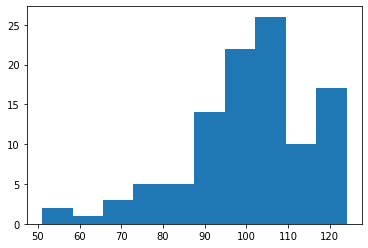

In [33]:
#histogram
plt.hist(grades.total)

(array([ 2.,  1.,  3.,  5.,  5., 14., 22., 26., 10., 17.]),
 array([ 51. ,  58.3,  65.6,  72.9,  80.2,  87.5,  94.8, 102.1, 109.4,
        116.7, 124. ]),
 <a list of 10 Patch objects>)

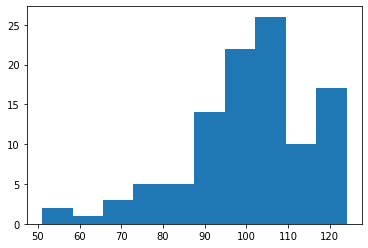

In [34]:
plt.hist(grades.total, bins = 'auto')

Text(0.5, 1.0, 'Histogram of total')

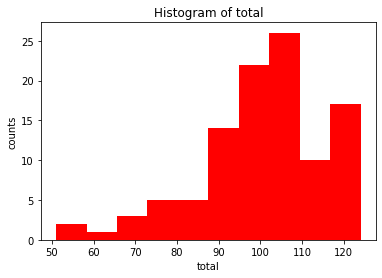

In [38]:
#do all below 4 together
plt.hist(grades.total, bins = 'auto', facecolor = 'red')
plt.xlabel('total')
plt.ylabel('counts')
plt.title('Histogram of total')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00F2DEB0>]],
      dtype=object)

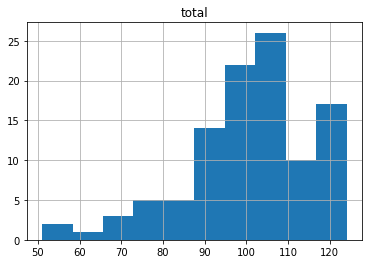

In [39]:
#see the differntegrids matplotlib
grades.hist('total')

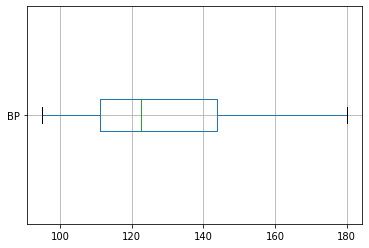

In [40]:
#------boxplot
cs2m.boxplot('BP', vert = False)

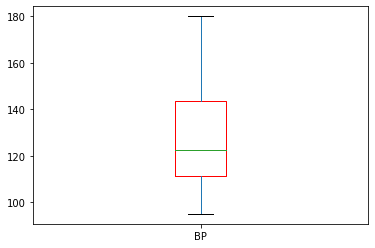

In [41]:
Bp = cs2m['BP']
props1 = dict(boxes = 'red')
Bp.plot.box(color=props1)

In [46]:
# horizontal and virtical boxplots
BP = cs2m['BP']

In [47]:
# making colorful
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')

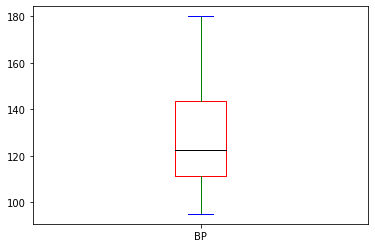

In [49]:
BP.plot.box(color=props2)

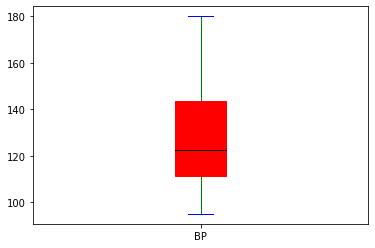

In [50]:
BP.plot.box(color = props2, patch_artist = True, vert = True)

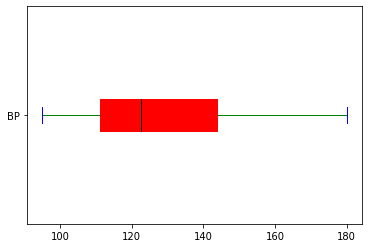

In [51]:
# matlpotlob... patch_artist = filling color
cs2m['BP'].plot.box(color=props2, patch_artist = True, vert = False)

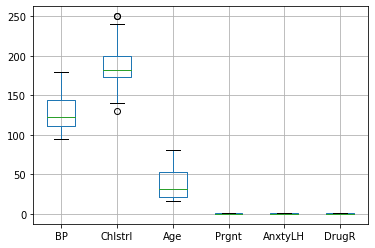

In [52]:
# boxplot of all vriables in data file
cs2m.boxplot()

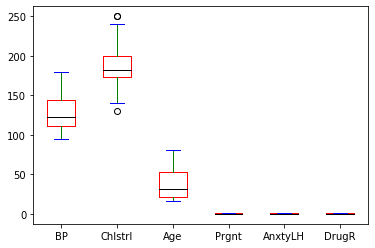

In [54]:
# making colorful
props3 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
cs2m.plot.box(color=props3)

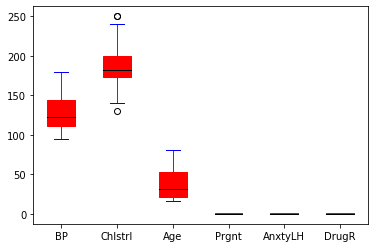

In [55]:
cs2m.plot.box(color=props3, patch_artist = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09A94C30>,
      dtype=object)

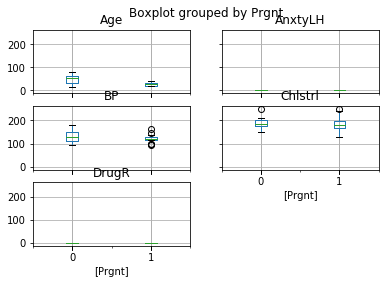

In [57]:
# boxplot of all versus prgnt
cs2m.boxplot(by = 'Prgnt')

In [58]:
# boxplot of total versus ethicity
df = grades[['total', 'ethnicity']]

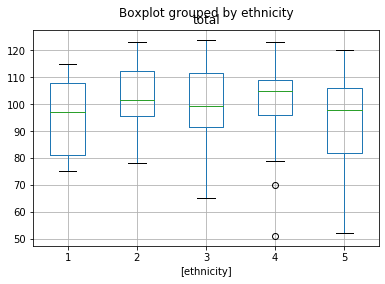

In [59]:
df.boxplot(by = 'ethnicity')

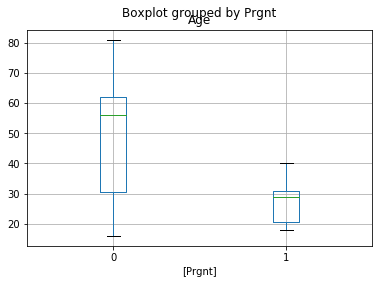

In [60]:
# boxplot of age versus prgnt
kf = cs2m[['Age', 'Prgnt']]
kf.boxplot(by = 'Prgnt')

{'whiskers': [<matplotlib.lines.Line2D at 0xadc5510>,
 'caps': [<matplotlib.lines.Line2D at 0xadc5b10>,
 'boxes': [<matplotlib.lines.Line2D at 0xadc5630>],
 'medians': [<matplotlib.lines.Line2D at 0xadd32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0xadd34d0>],
 'means': []}

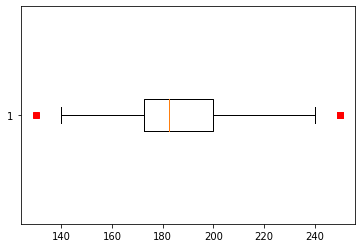

In [61]:
# matplotlib.pyplot---- boxplot

plt.boxplot(cs2m.Chlstrl, 0, 'rs', 0)

# 1st 0 = rectange; 'rs' is color for outlier
# last 0 for horizontal (1 for vertical)

{'whiskers': [<matplotlib.lines.Line2D at 0xae08250>,
 'caps': [<matplotlib.lines.Line2D at 0xae08850>,
 'boxes': [<matplotlib.lines.Line2D at 0xae08370>],
 'medians': [<matplotlib.lines.Line2D at 0xae08d10>],
 'fliers': [<matplotlib.lines.Line2D at 0xae0f210>],
 'means': []}

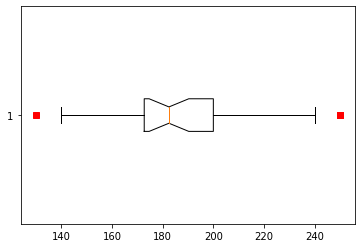

In [62]:
plt.boxplot(cs2m.Chlstrl, 1, 'rs', 0)

{'whiskers': [<matplotlib.lines.Line2D at 0xae57310>,
 'caps': [<matplotlib.lines.Line2D at 0xae57830>,
 'boxes': [<matplotlib.lines.Line2D at 0xae570f0>],
 'medians': [<matplotlib.lines.Line2D at 0xae57d50>],
 'fliers': [<matplotlib.lines.Line2D at 0xae57f70>],
 'means': []}

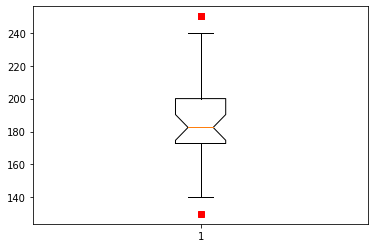

In [64]:
plt.boxplot(cs2m.Chlstrl, 1, 'rs', 1)

In [65]:
# Data manipulation 
# .iloc stands for indexing
# 0 = sr_no, 1 = id, 2 = lastanme, 3 = firstname, 4 = will be neglected
grades.iloc[:, 0:4].head(3)

,Sr_No,id,lastname,firstname
0,1,106484,VILLARRUZ,ALFRED
1,2,108642,VALAZQUEZ,SCOTT
2,3,127285,GALVEZ,JACKIE


In [67]:
# row only 20 to 22 columns 1 to 4
grades.iloc[20:22, 0:4].head(3) # 4th in indexwill be committed

,Sr_No,id,lastname,firstname
20,21,273611,WU,VIDYUTH
21,22,280440,CHANG,RENE


In [68]:
# rows from 1 to 12 row
cs2m1 = cs2m[0:12] #12 row (actually 13th) will ommitted


In [71]:
cs2m1

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0
3,100,175,25,0,0,0
4,95,250,36,0,0,0
5,110,200,56,0,1,0
6,120,180,59,0,1,0
7,150,175,45,0,1,0
8,160,185,40,0,1,0
9,125,195,20,1,0,0


In [72]:
cs2m1.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0
3,100,175,25,0,0,0
4,95,250,36,0,0,0


In [73]:
# random sample 
#impoprt random
from random import sample
#sample as per percentage
cs2m.sample(frac=0.3, replace=False, random_state=123)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
7,150,175,45,0,1,0
29,140,190,73,0,1,1
5,110,200,56,0,1,0
26,170,200,56,0,1,1
8,160,185,40,0,1,0
27,145,210,58,0,1,1
12,145,175,30,1,0,0
21,120,140,38,1,1,1
11,165,200,25,1,0,0


In [74]:
cs2m.sample(frac=0.3, replace=False)
# diffent set of rows will apper

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
5,110,200,56,0,1,0
10,135,190,18,1,0,0
20,120,130,35,1,1,1
14,100,180,21,1,0,0
13,120,180,28,1,0,0
28,180,200,81,0,1,1
6,120,180,59,0,1,0
7,150,175,45,0,1,0
17,120,200,30,1,0,1


In [76]:
# sample as per counts
sp = cs2m.sample(10, random_state =21)
sp

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
5,110,200,56,0,1,0
23,115,185,40,1,1,1
22,125,160,32,1,1,1
28,180,200,81,0,1,1
1,120,160,16,0,0,0
21,120,140,38,1,1,1
19,130,172,30,1,0,1
7,150,175,45,0,1,0
27,145,210,58,0,1,1
11,165,200,25,1,0,0


In [80]:
# selecting choiced variables , all rows 
# all rows and columns 1,3,5
# 0 is sr_no, will be ignored
cs2m.iloc[:, (1, 3, 5)].head(3)

IndexingError: Too many indexers

In [81]:
# selection 
# another method for data frame
a = grades[['quiz1','gpa','final']]
a.head()

,quiz1,gpa,final
0,6,1.18,53
1,10,2.19,54
2,10,2.46,57
3,7,3.98,68
4,7,1.84,66


In [82]:
# which?_________.compress
cs2m.BP.compress((cs2m.BP == 170))

C:\Users\mrspider\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.compress(condition) is deprecated. Use 'Series[condition]' or 'np.asarray(series).compress(condition)' instead.
  


26    170
Name: BP, dtype: int64